<a href="https://colab.research.google.com/github/SandeepReddy1208/Codeclause/blob/main/Codeclause_WineQualityPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
df=pd.read_csv("/content/winequality.csv")
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
print(df.columns)
print(df.shape)

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')
(6497, 13)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [6]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
fixed acidity,6487.0,7.216579,1.296750,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6489.0,0.339691,0.164649,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6494.0,0.318722,0.145265,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6495.0,5.444326,4.758125,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6495.0,0.056042,0.035036,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6488.0,3.218395,0.160748,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6493.0,0.531215,0.148814,0.22000,0.43000,0.51000,0.60000,2.00000


In [7]:
df.nunique()

type                      2
fixed acidity           106
volatile acidity        187
citric acid              89
residual sugar          316
chlorides               214
free sulfur dioxide     135
total sulfur dioxide    276
density                 998
pH                      108
sulphates               111
alcohol                 111
quality                   7
dtype: int64

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64


<Axes: xlabel='quality', ylabel='count'>

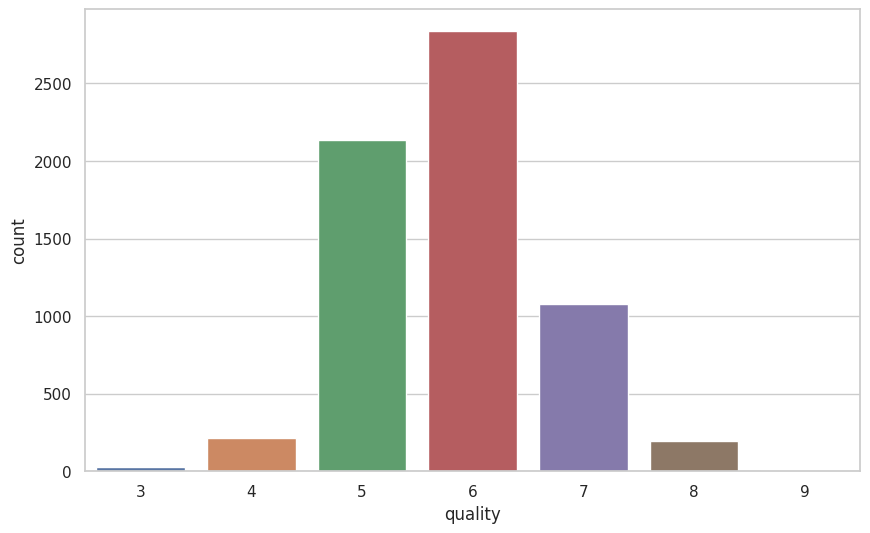

In [8]:
sns.set(style="whitegrid")
print(df['quality'].value_counts())
fig = plt.figure(figsize = (10,6))
sns.countplot(data=df,x='quality')

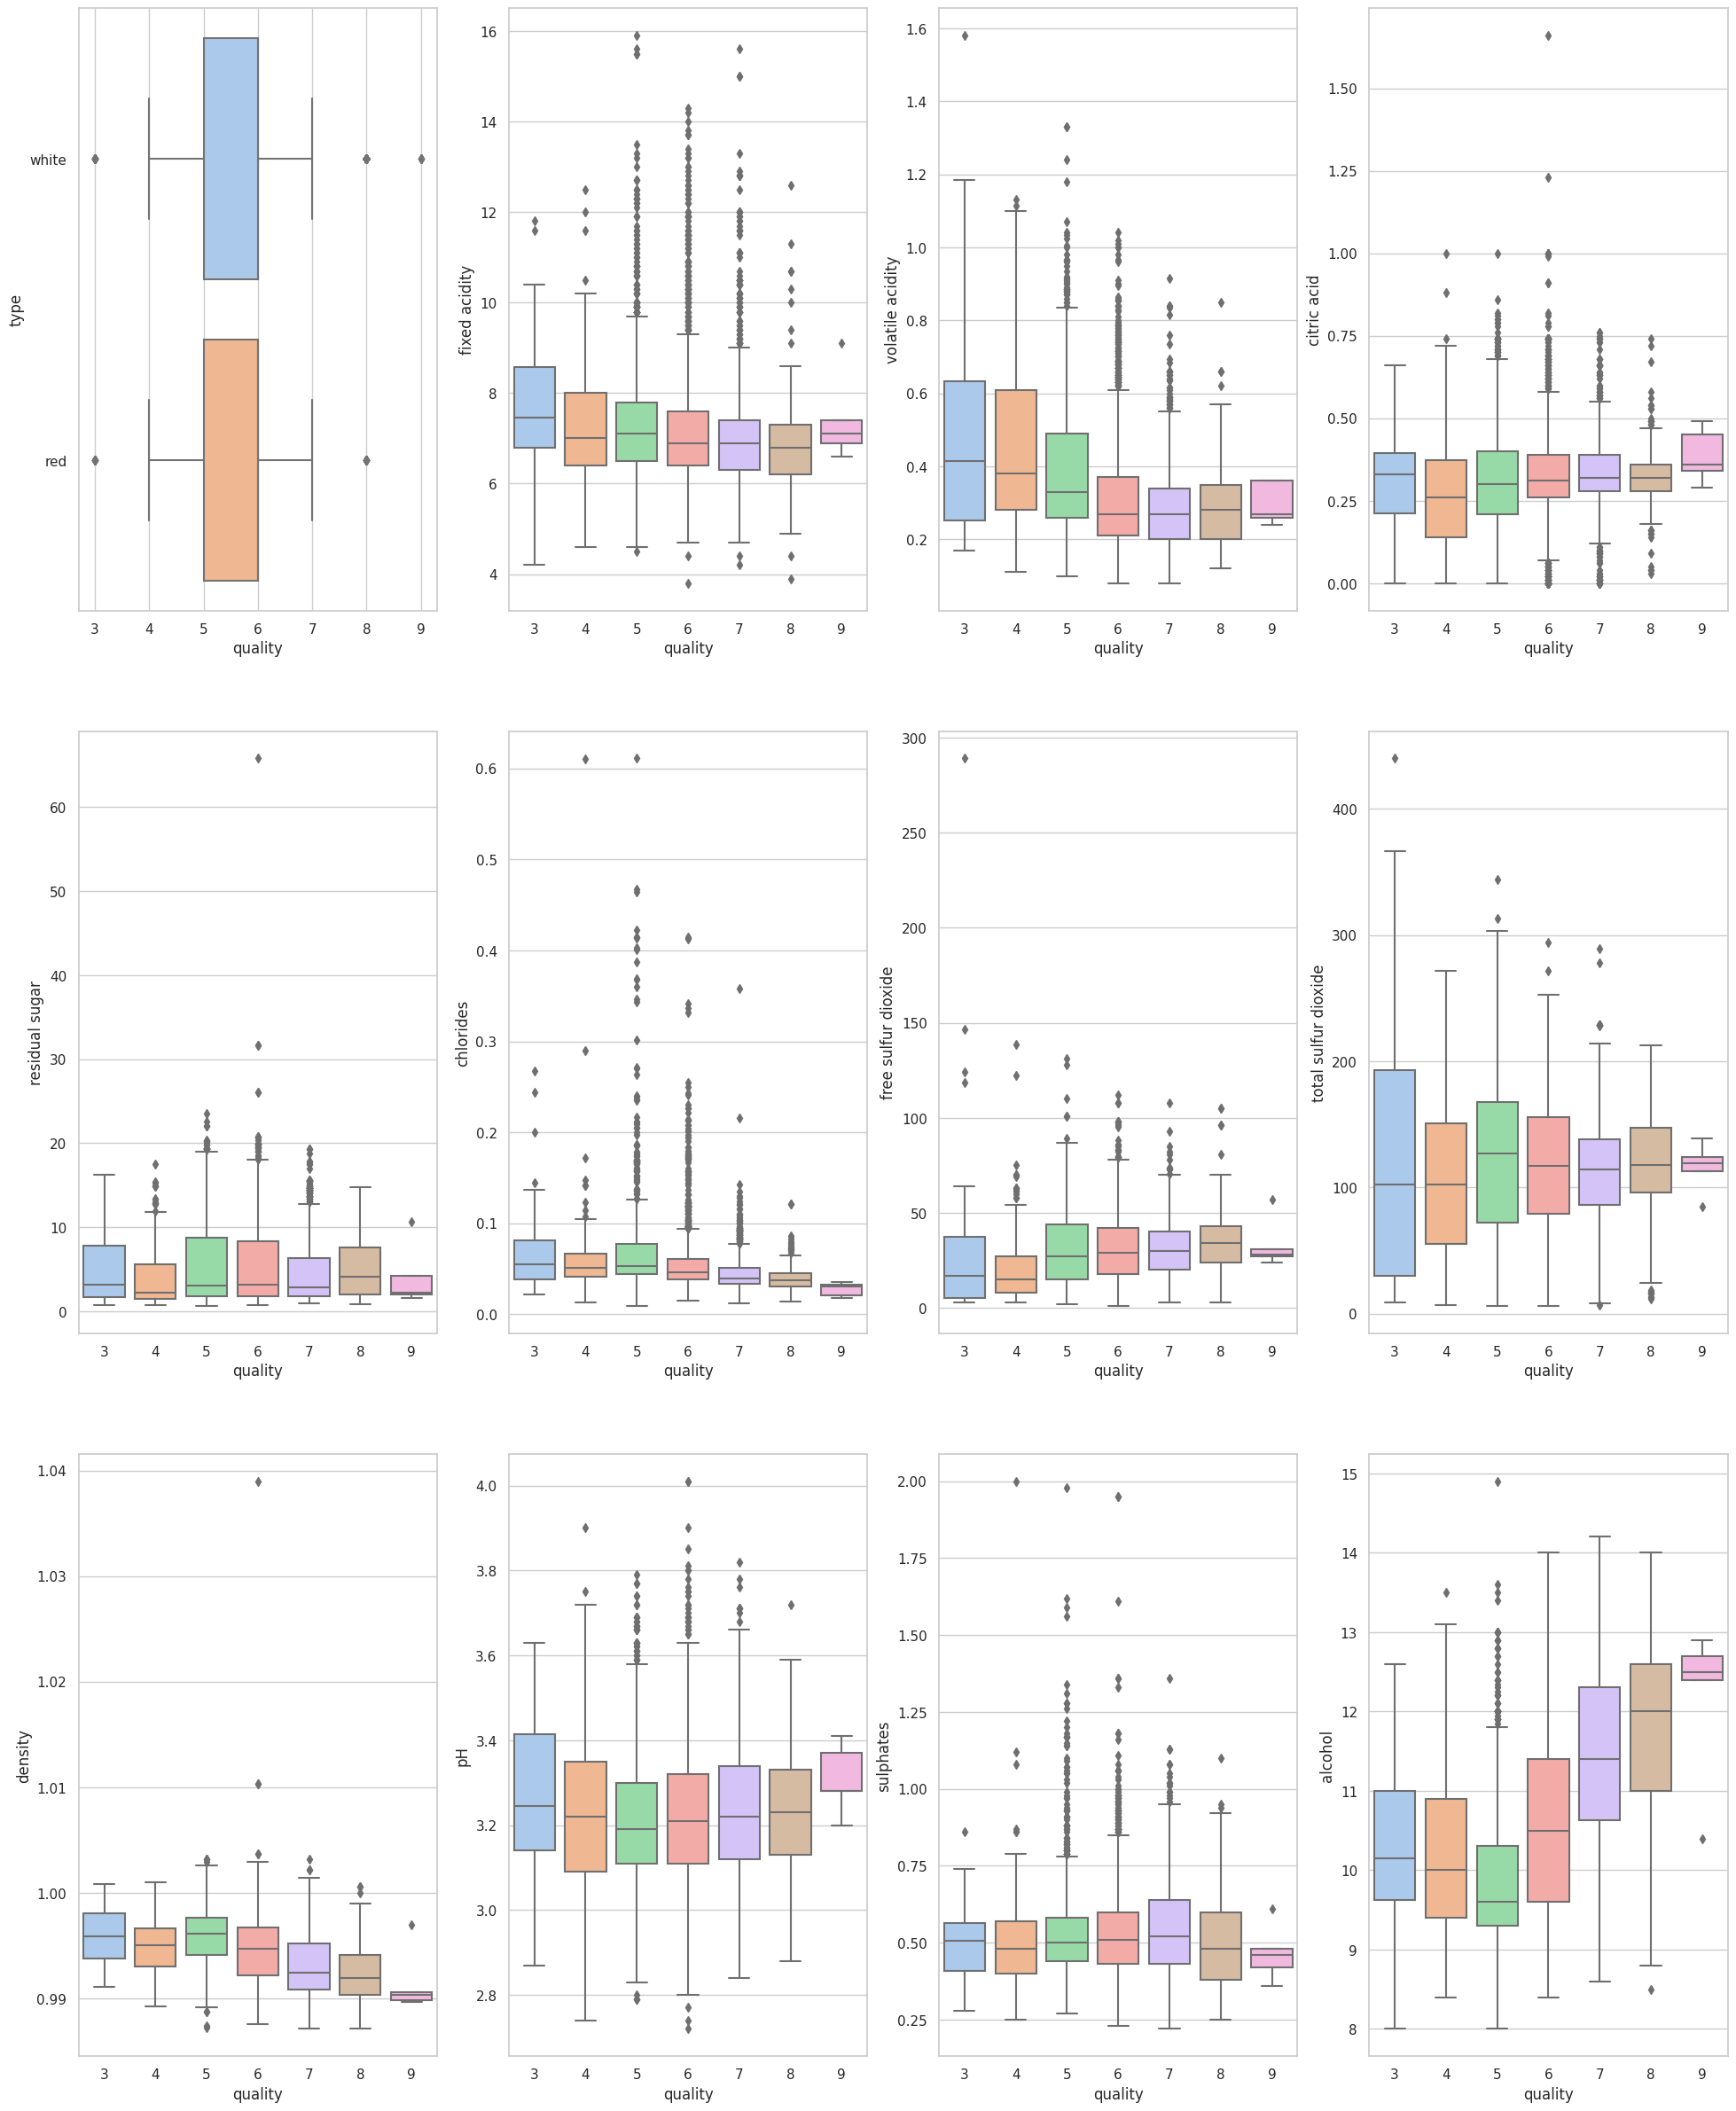

In [9]:
import warnings
warnings.filterwarnings("ignore")

sns.set(style="whitegrid")
fig, ax1 = plt.subplots(3,4, figsize=(24,30))
k = 0
columns = list(df.columns)
for i in range(3):
    for j in range(4):
            sns.boxplot(x='quality', y=columns[k], data=df, ax=ax1[i][j], palette='pastel')
            k += 1
plt.show()

<Axes: >

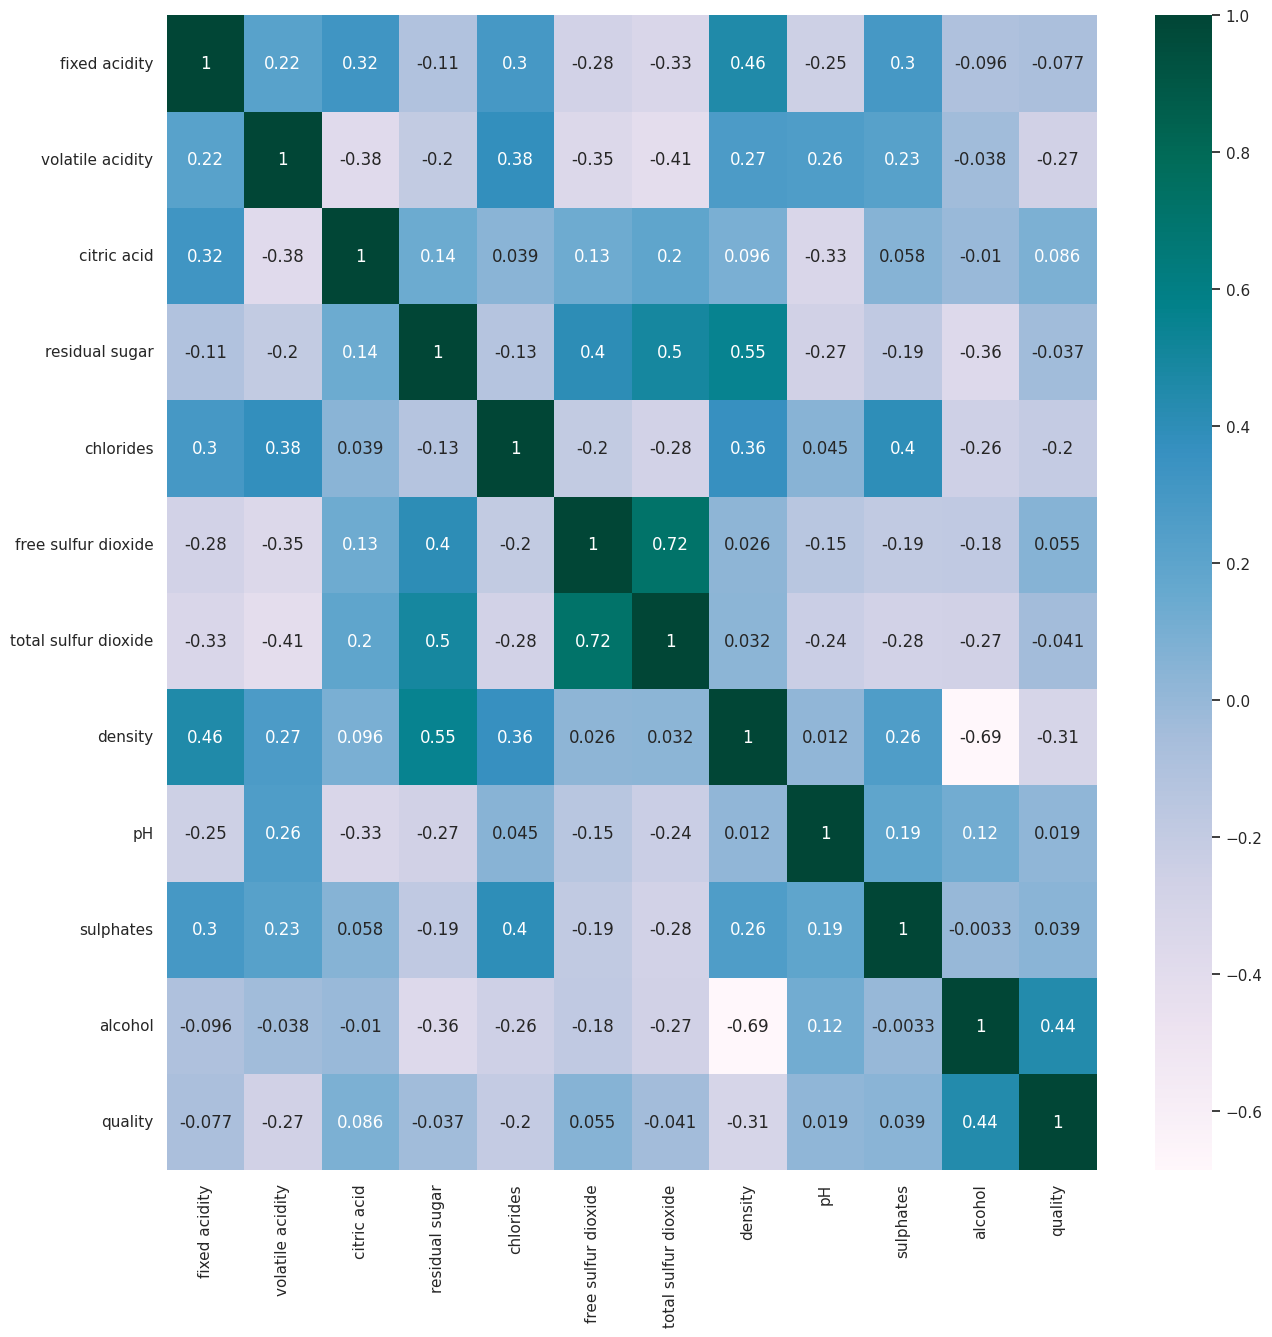

In [10]:
plt.figure(figsize = (15,15))
sns.heatmap(df.corr(),annot=True, cmap= 'PuBuGn')

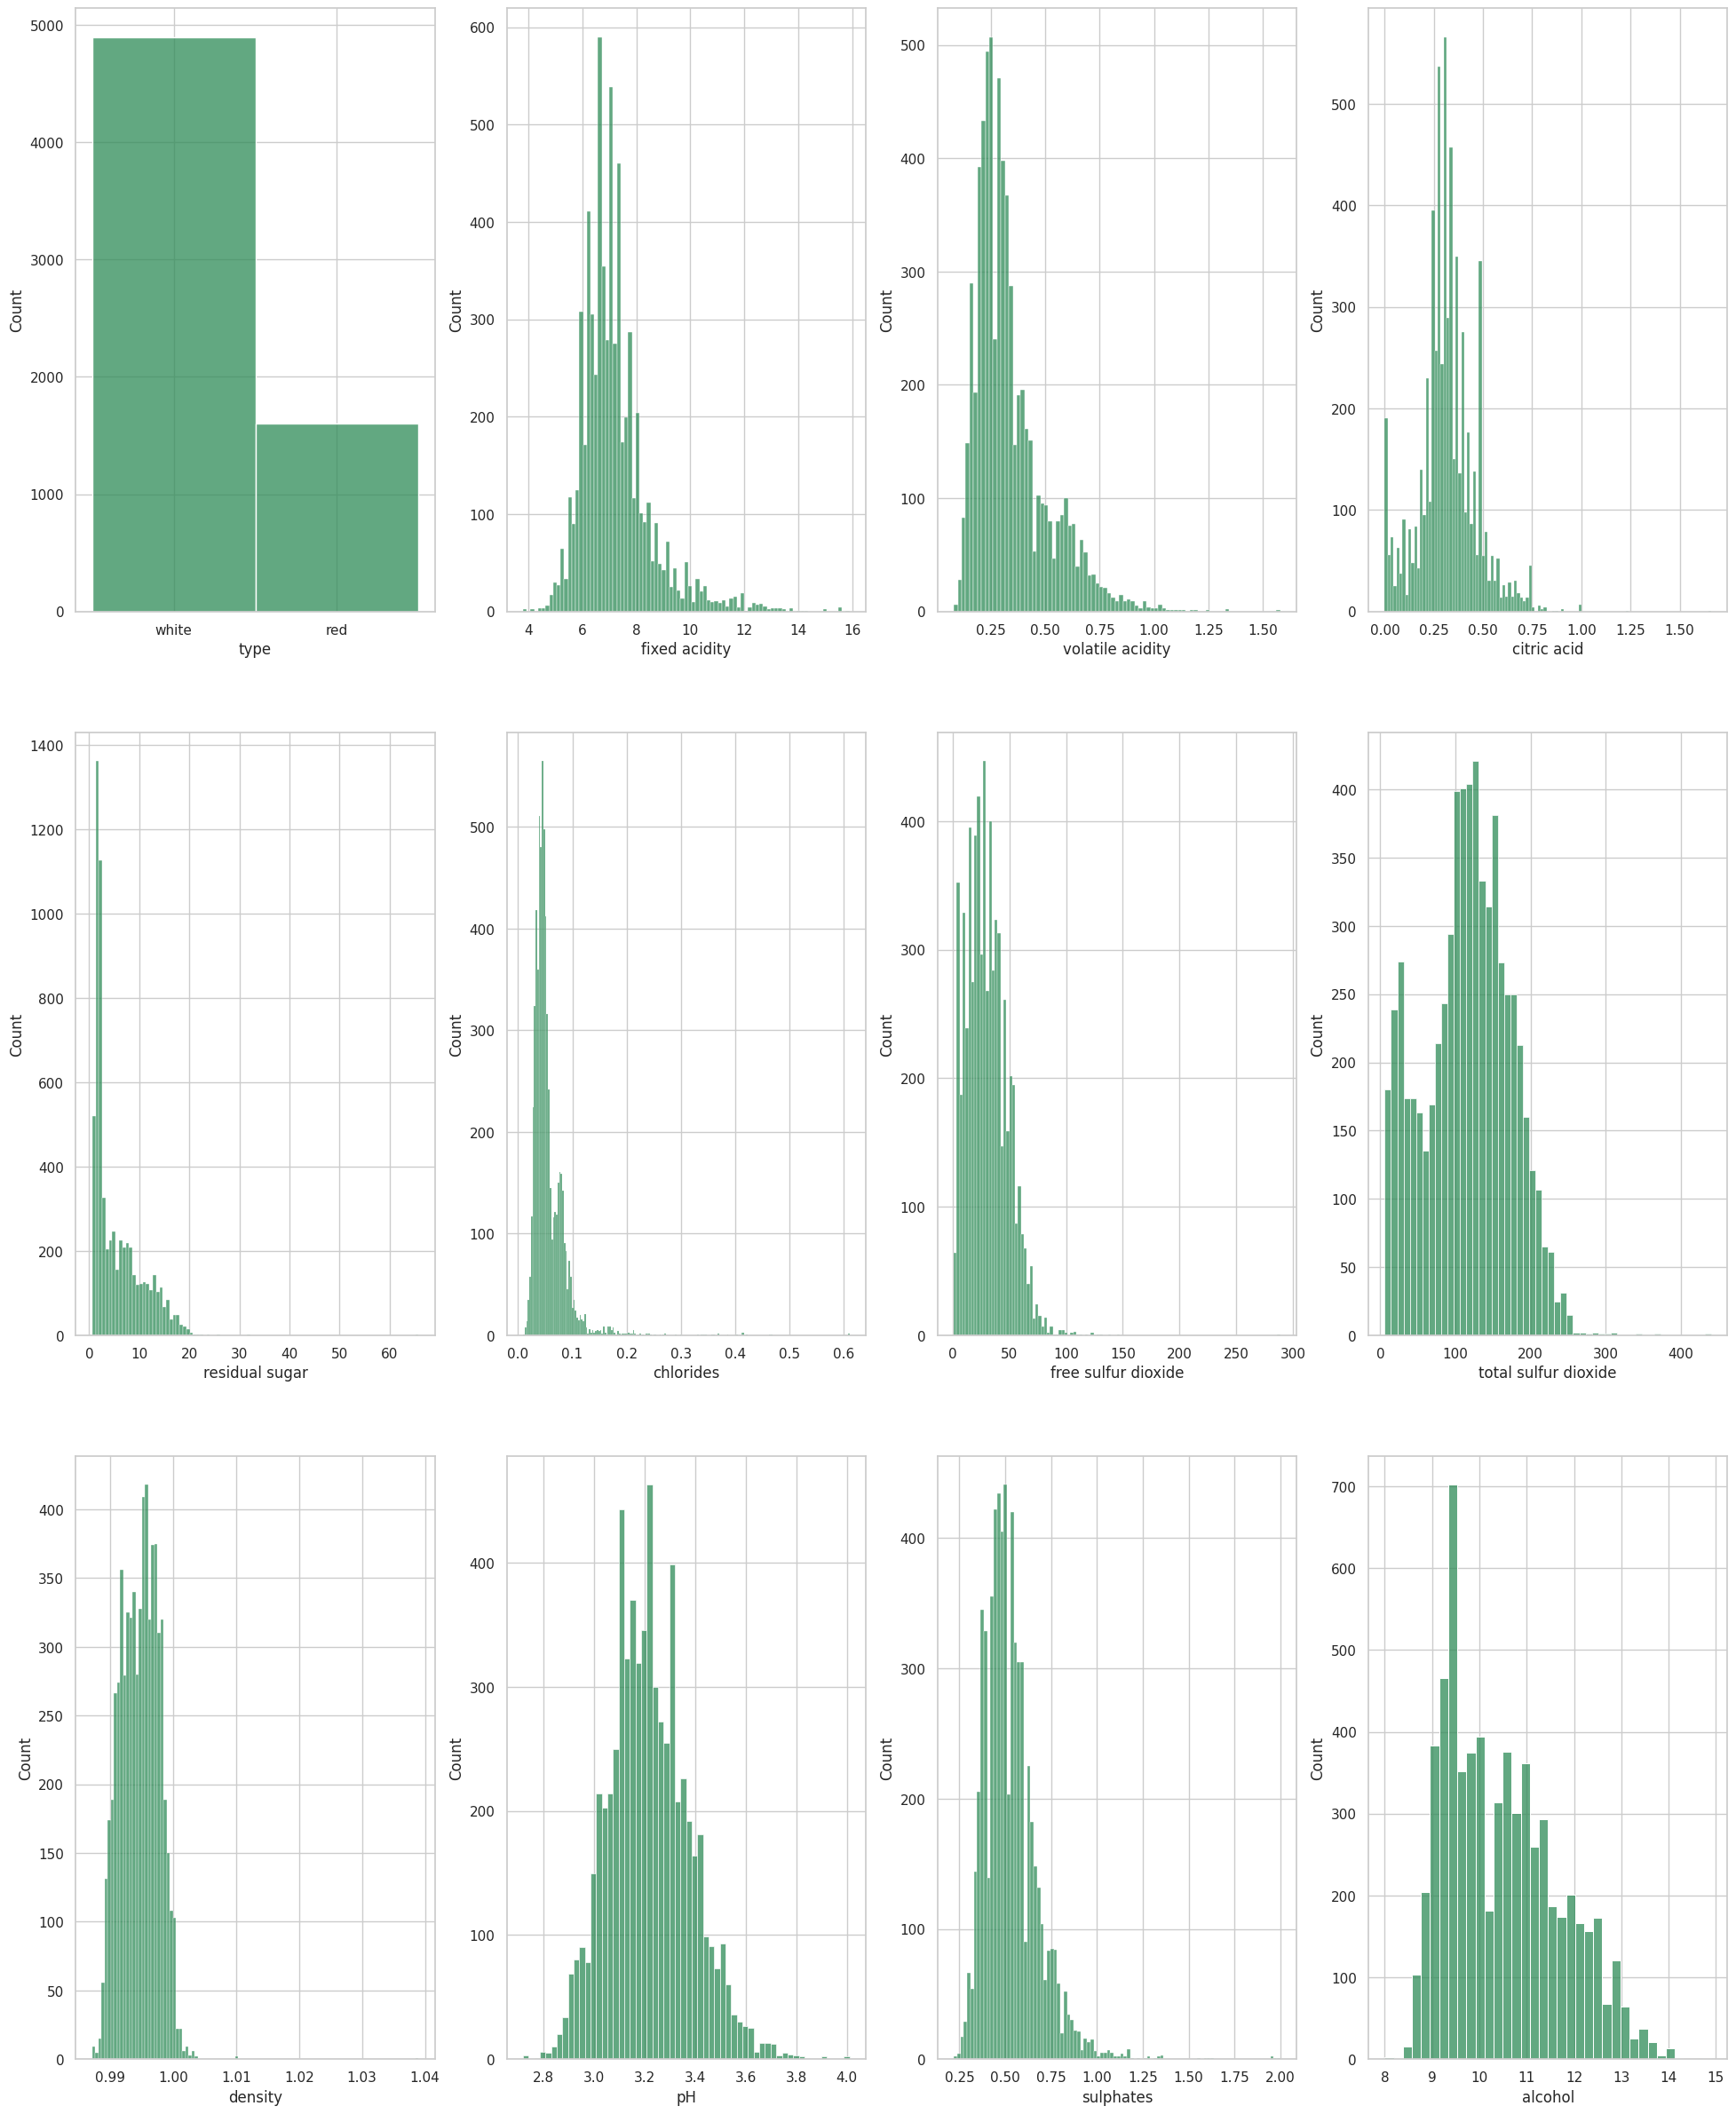

In [11]:
color = sns.color_palette("pastel")

fig, ax1 = plt.subplots(3,4, figsize=(24,30))
k = 0
columns = list(df.columns)
for i in range(3):
    for j in range(4):
            sns.histplot(data=df, x=columns[k], ax=ax1[i][j], color='seagreen')
            k += 1
plt.show()

In [12]:
def log_transform(col):
    return np.log(col[0])

df['residual sugar'] = df[['residual sugar']].apply(log_transform, axis=1)
df['chlorides'] = df[['chlorides']].apply(log_transform, axis=1)
df['free sulfur dioxide'] = df[['free sulfur dioxide']].apply(log_transform, axis=1)
df['total sulfur dioxide'] = df[['total sulfur dioxide']].apply(log_transform, axis=1)
df['sulphates'] = df[['sulphates']].apply(log_transform, axis=1)



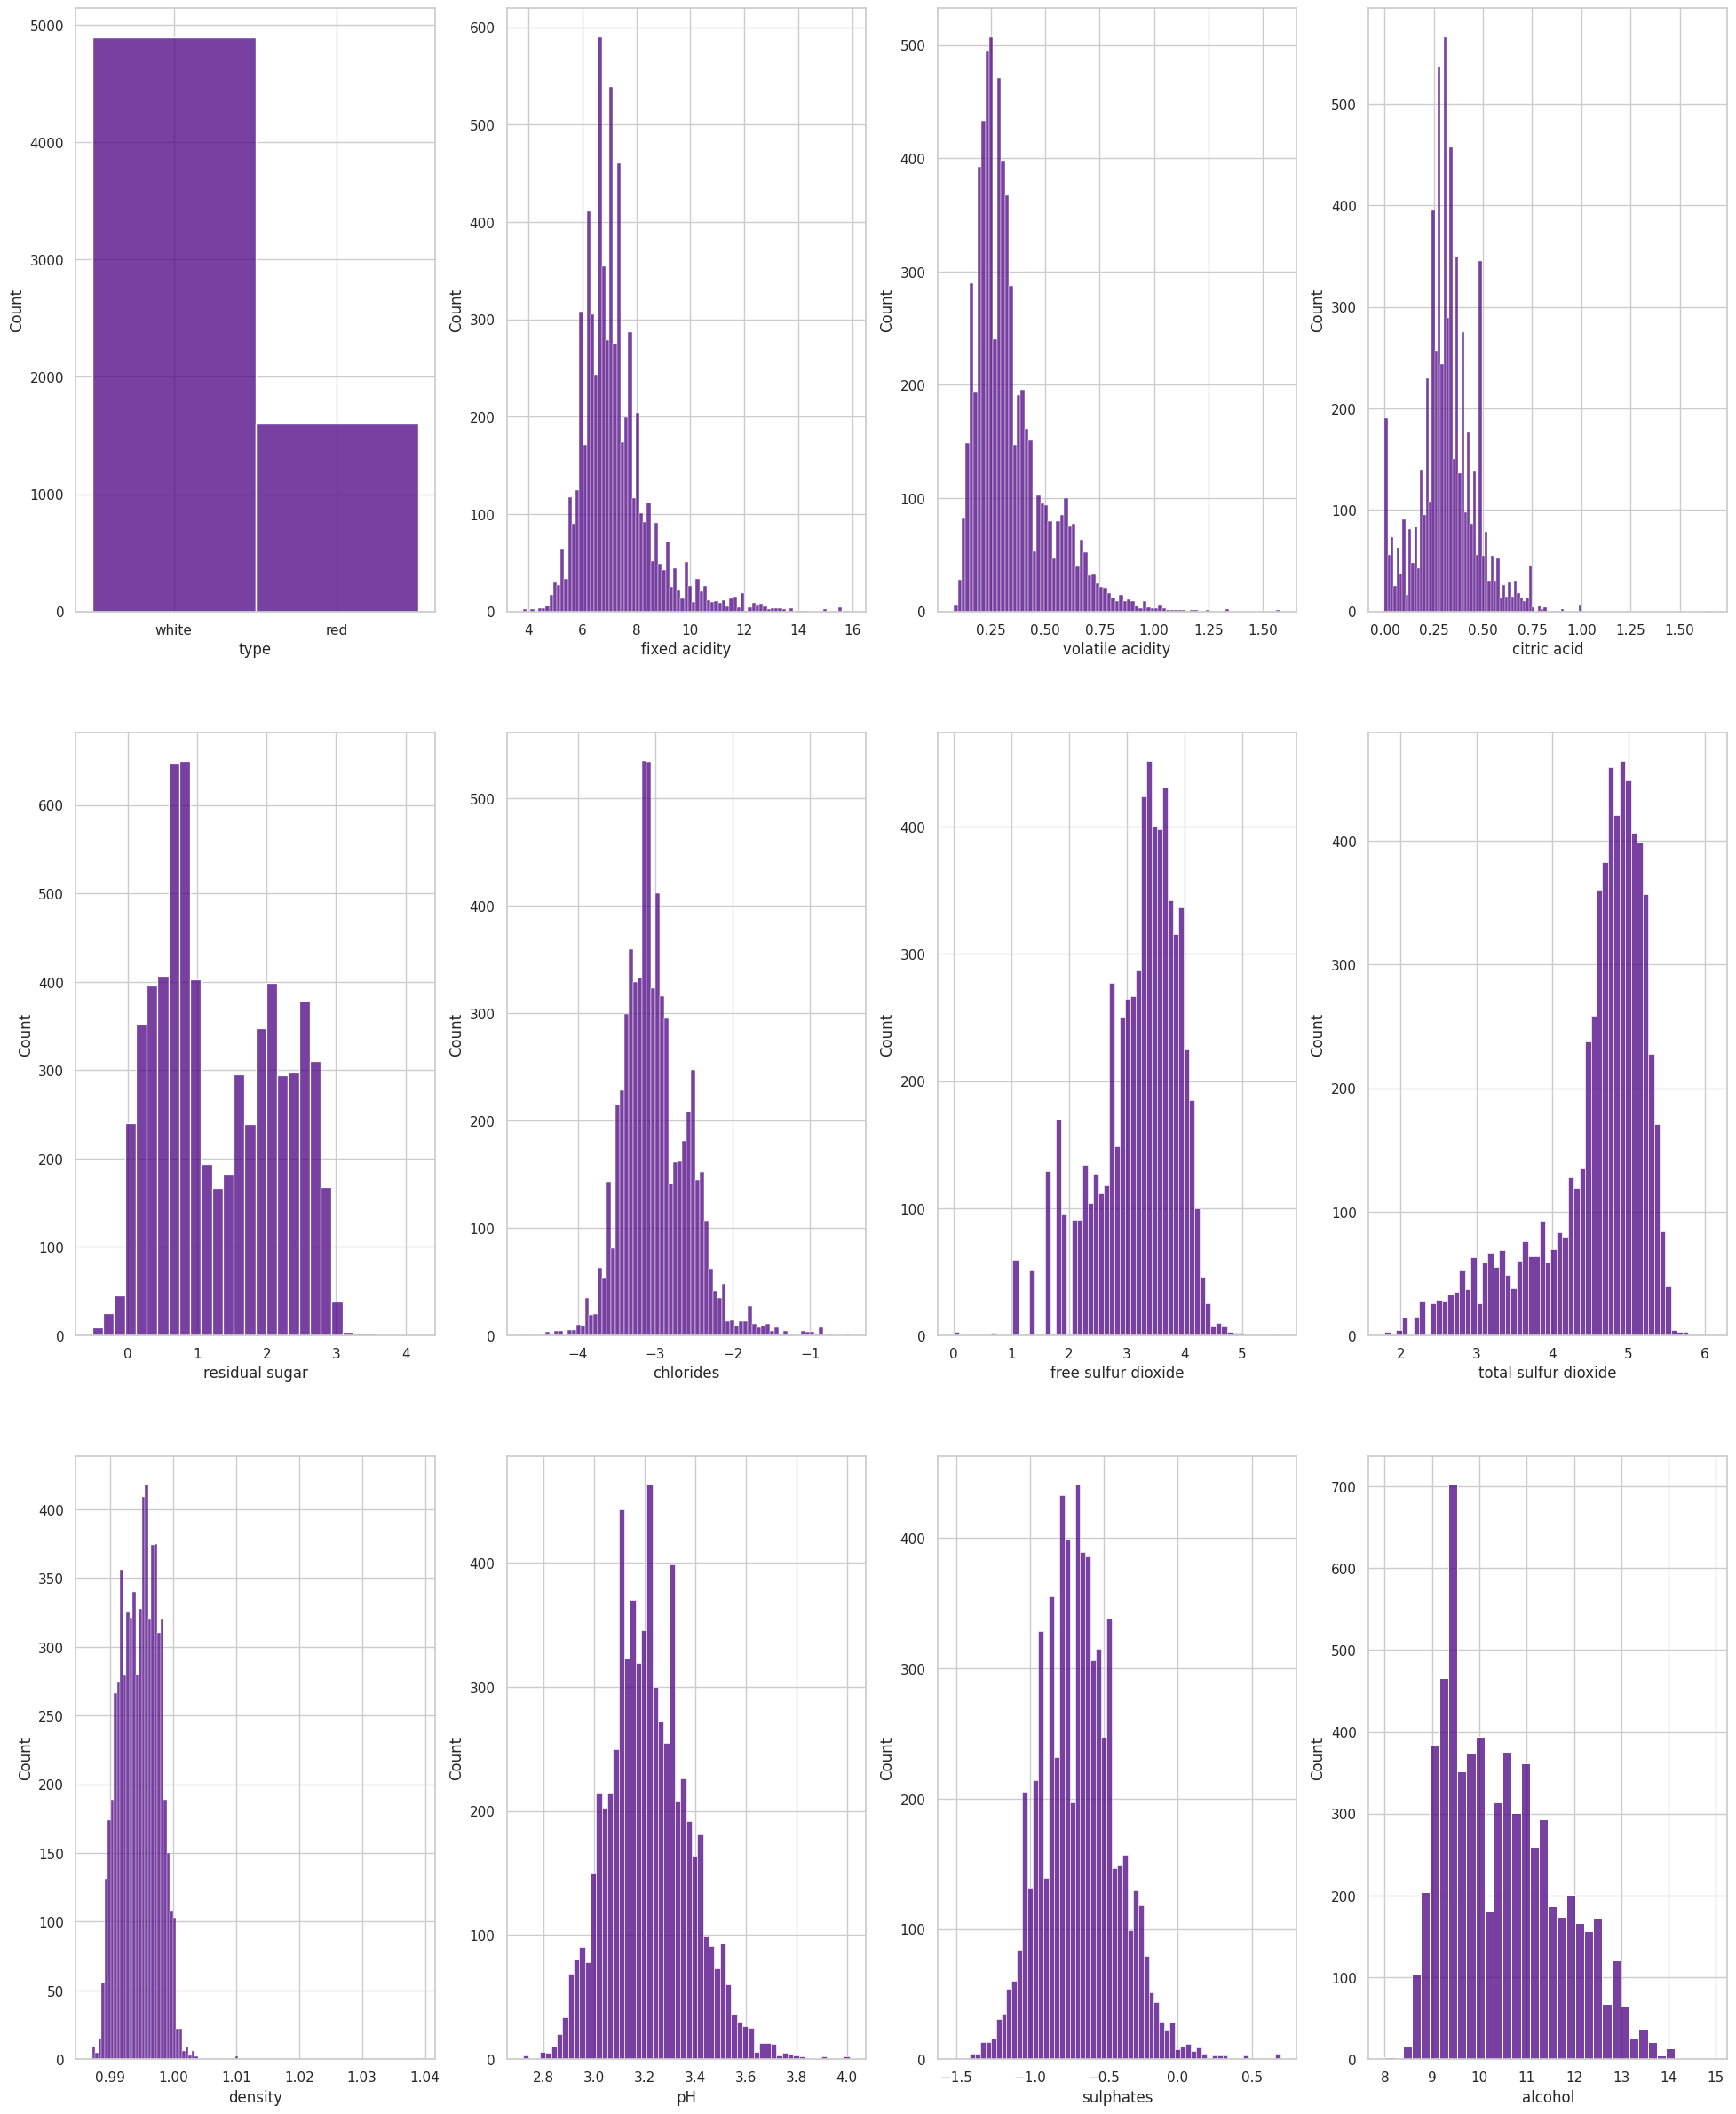

In [13]:
color = sns.color_palette("pastel")

fig, ax1 = plt.subplots(3,4, figsize=(24,30))
k = 0
columns = list(df.columns)
for i in range(3):
    for j in range(4):
            sns.histplot(data=df, x=columns[k], ax=ax1[i][j], color='indigo')
            k += 1
plt.show()

In [14]:
df.corr()['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.444319
free sulfur dioxide     0.113564
citric acid             0.085706
sulphates               0.027718
pH                      0.019366
total sulfur dioxide    0.009365
residual sugar         -0.012836
fixed acidity          -0.077031
volatile acidity       -0.265953
chlorides              -0.267704
density                -0.305858
Name: quality, dtype: float64

In [15]:
df_3 = df[df.quality==3]
df_4 = df[df.quality==4]
df_5 = df[df.quality==5]
df_6 = df[df.quality==6]
df_7 = df[df.quality==7]
df_8 = df[df.quality==8]

In [16]:
from sklearn.utils import resample

df_3_upsampled = resample(df_3, replace=True, n_samples=600, random_state=12)
df_4_upsampled = resample(df_4, replace=True, n_samples=600, random_state=12)
df_7_upsampled = resample(df_7, replace=True, n_samples=600, random_state=12)
df_8_upsampled = resample(df_8, replace=True, n_samples=600, random_state=12)
df_5_downsampled = df[df.quality==5].sample(n=600).reset_index(drop=True)
df_6_downsampled = df[df.quality==6].sample(n=600).reset_index(drop=True)

In [17]:
Balanced_df = pd.concat([df_3_upsampled, df_4_upsampled, df_7_upsampled,
                         df_8_upsampled, df_5_downsampled, df_6_downsampled]).reset_index(drop=True)

Balanced_df.quality.value_counts()

3    600
4    600
7    600
8    600
5    600
6    600
Name: quality, dtype: int64

<Axes: xlabel='quality', ylabel='count'>

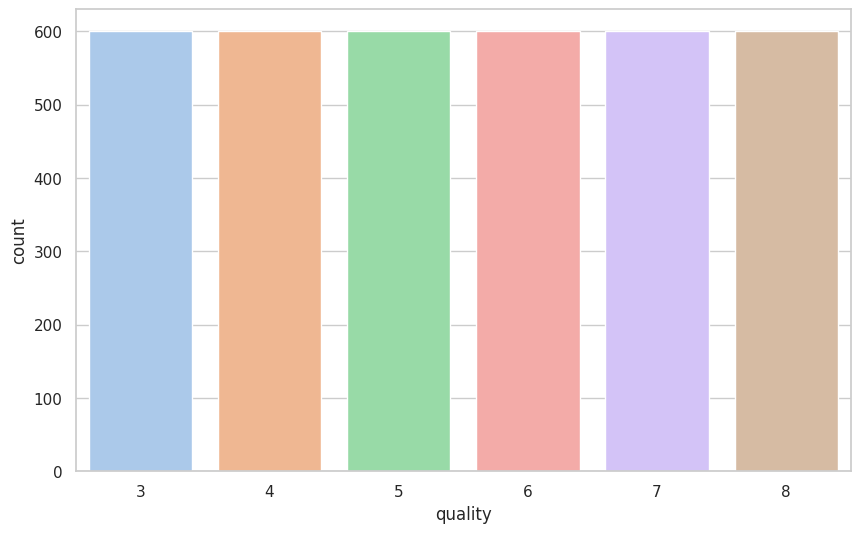

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(x='quality', data=Balanced_df, order=[3, 4, 5, 6, 7, 8], palette='pastel')

<Axes: xlabel='quality', ylabel='alcohol'>

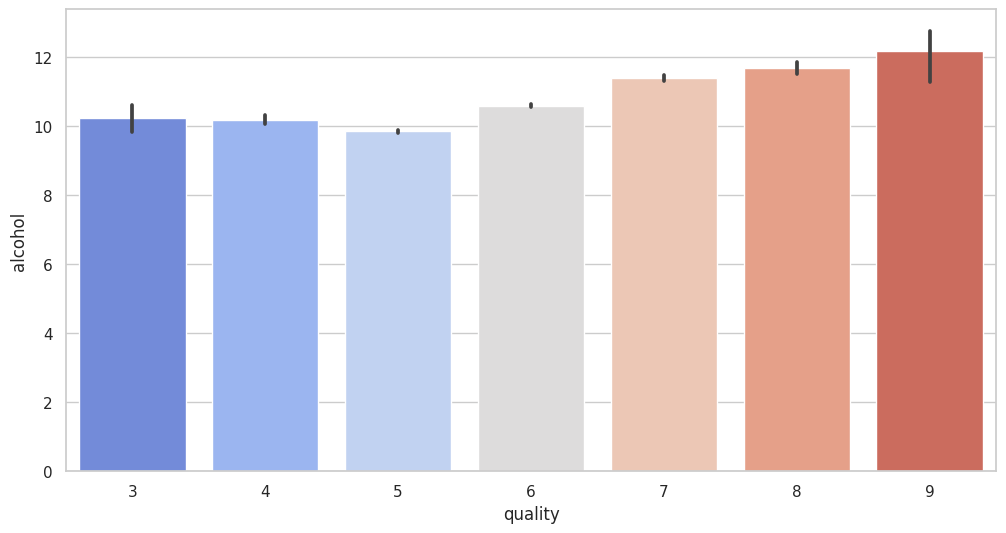

In [19]:
plt.figure(figsize = (12,6))
sns.barplot(x='quality', y = 'alcohol', data = df, palette = 'coolwarm')

Text(0, 0.5, 'Features')

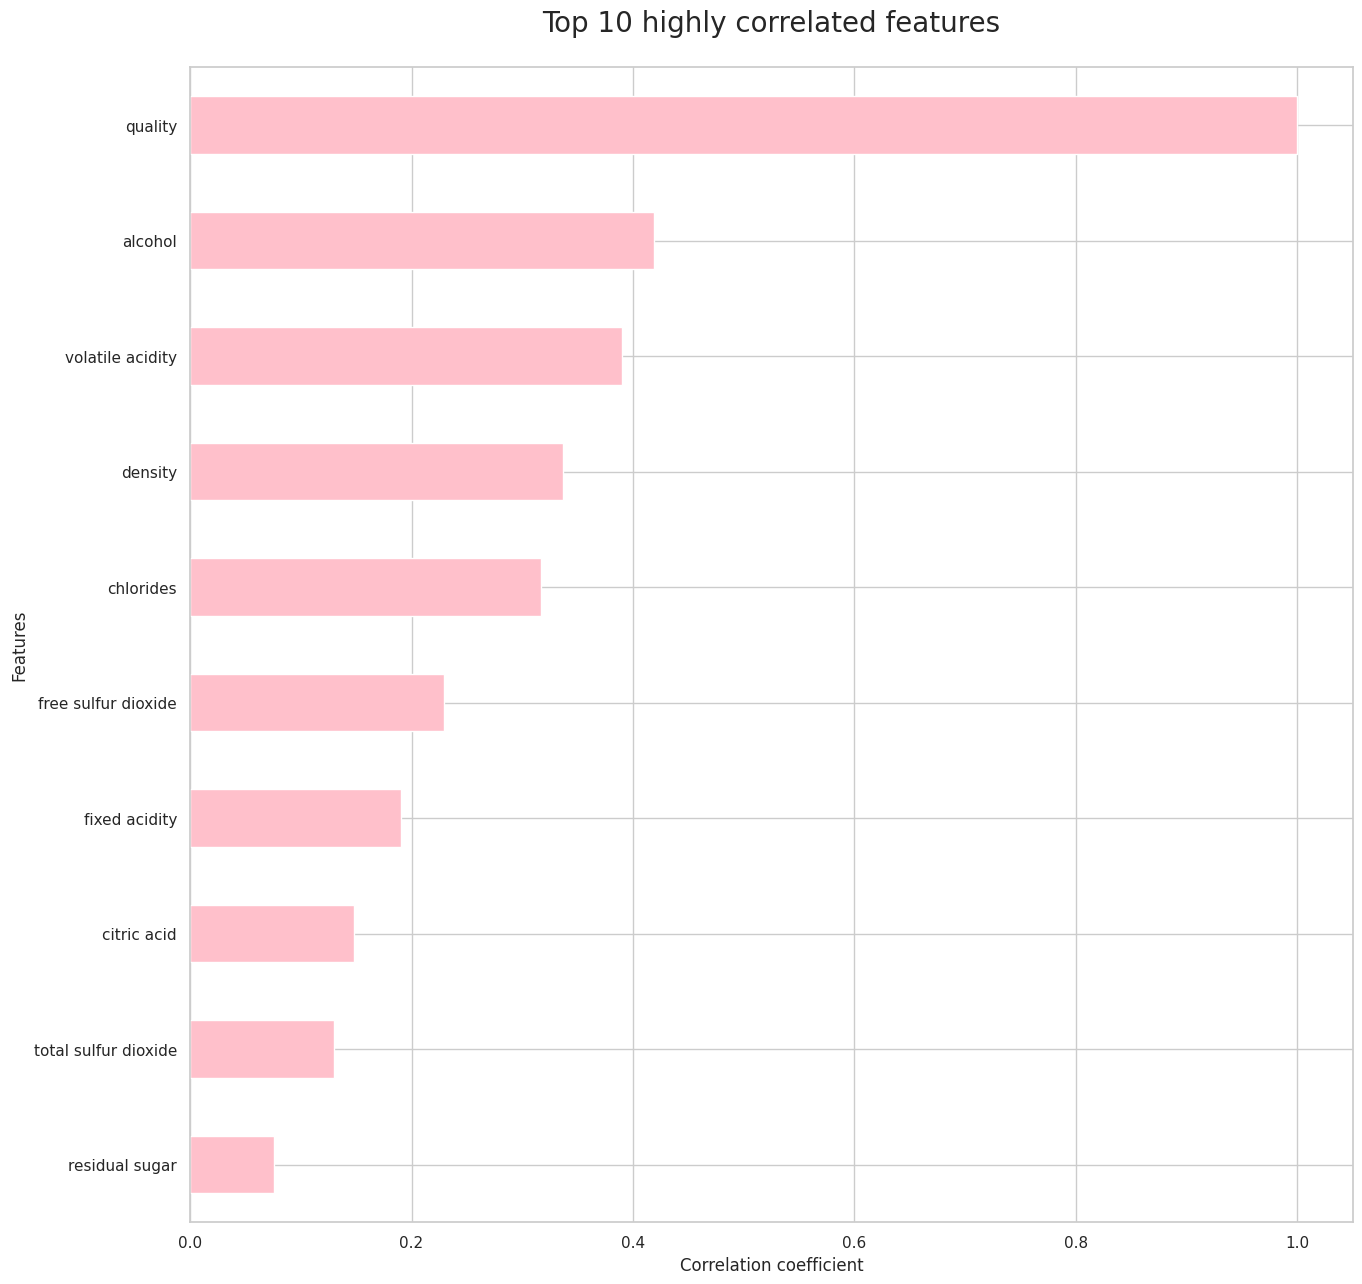

In [20]:
plt.figure(figsize=(15,15))
Balanced_df.corr().quality.apply(lambda x: abs(x)).sort_values(ascending=False).iloc[0:10][::-1].plot(kind='barh',color='pink')

plt.title("Top 10 highly correlated features", size=20, pad=26)
plt.xlabel("Correlation coefficient")
plt.ylabel("Features")

In [21]:
selected_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides',
                     'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH',
                     'sulphates', 'alcohol']

X = Balanced_df[selected_features]
y = Balanced_df.quality

In [22]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3,random_state=13)


In [23]:
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier

# Create an imputer to fill missing values with the mean
imputer = SimpleImputer(strategy='mean')

# Fills missing values
X_train_filled = imputer.fit_transform(X_train)
X_test_filled = imputer.transform(X_test)

# Create and train the KNeighborsClassifier model
for n_neighbors in [5, 10, 15, 20]:
    model = KNeighborsClassifier(n_neighbors)
    model.fit(X_train_filled, y_train)
    scr = model.score(X_test_filled, y_test)
    print("For n_neighbors =", n_neighbors, "score is", scr)

For n_neighbors = 5 score is 0.6546296296296297
For n_neighbors = 10 score is 0.5972222222222222
For n_neighbors = 15 score is 0.562037037037037
For n_neighbors = 20 score is 0.5342592592592592


In [24]:
KNN_Model = KNeighborsClassifier(n_neighbors=5, weights='distance')

KNN_Model.fit(X_train_filled, y_train)
results = KNN_Model.fit(X_train_filled, y_train)

In [25]:
KNN_train_predictions = KNN_Model.predict(X_train_filled)

In [26]:
KNN_test_predictions = KNN_Model.predict(X_test_filled)

In [27]:
from sklearn.metrics import classification_report, confusion_matrix

print("\n Train Data: KNN_Confusion Matrix:\n ")
print(confusion_matrix(y_train, KNN_train_predictions))

print("\n Train Data: KNN_Classification Report:\n ")
print(classification_report(y_train, KNN_train_predictions))

print("\n \n Test Data: KNN_Confusion Matrix: \n ")
print(confusion_matrix(y_test, KNN_test_predictions))

print("\n Test Data: KNN_Classification Report:\n ")
print(classification_report(y_test, KNN_test_predictions))


 Train Data: KNN_Confusion Matrix:
 
[[422   0   0   0   0   0]
 [  0 392   0   0   0   0]
 [  0   0 423   0   0   0]
 [  0   0   0 436   0   0]
 [  0   0   0   0 423   0]
 [  0   0   0   0   0 424]]

 Train Data: KNN_Classification Report:
 
              precision    recall  f1-score   support

           3       1.00      1.00      1.00       422
           4       1.00      1.00      1.00       392
           5       1.00      1.00      1.00       423
           6       1.00      1.00      1.00       436
           7       1.00      1.00      1.00       423
           8       1.00      1.00      1.00       424

    accuracy                           1.00      2520
   macro avg       1.00      1.00      1.00      2520
weighted avg       1.00      1.00      1.00      2520


 
 Test Data: KNN_Confusion Matrix: 
 
[[178   0   0   0   0   0]
 [  3 195   1   3   6   0]
 [  4  26 102  28   9   8]
 [  3  20  34  47  37  23]
 [  0   1   7  14 136  19]
 [  0   0   1   1   1 173]]

 Test Dat